# Updated Code on CNN with Fruits Image Datasets [MYcode.V3]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn.model_selection import train_test_split
import os

In [4]:
np.random.seed(1)

In [5]:
train_images = []
train_labels = []

shape = (150, 150)
train_datasets_path = "datasets/train_zip/train/"
for filename in os.listdir("datasets/train_zip/train/"):
    if filename.split('.')[1] =='jpg':
        img = cv2.imread(os.path.join(train_datasets_path, filename))
        train_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        train_images.append(img)

train_labels = pd.get_dummies(train_labels).values
train_images = np.array(train_images)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [6]:
train_images = train_images.astype('float32')
train_images = train_images/255

In [7]:
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.33, random_state=1)

In [8]:
x_train

array([[[[0.9411765 , 0.91764706, 0.92156863],
         [0.9411765 , 0.92156863, 0.9254902 ],
         [0.9372549 , 0.9254902 , 0.9254902 ],
         ...,
         [0.9411765 , 0.92156863, 0.92941177],
         [0.9372549 , 0.91764706, 0.9254902 ],
         [0.93333334, 0.9137255 , 0.92156863]],

        [[0.9411765 , 0.91764706, 0.92156863],
         [0.9411765 , 0.92156863, 0.9254902 ],
         [0.9372549 , 0.9254902 , 0.92941177],
         ...,
         [0.9411765 , 0.92156863, 0.92941177],
         [0.9372549 , 0.91764706, 0.9254902 ],
         [0.93333334, 0.9137255 , 0.92156863]],

        [[0.9411765 , 0.91764706, 0.92156863],
         [0.9411765 , 0.92156863, 0.9254902 ],
         [0.9372549 , 0.9254902 , 0.9254902 ],
         ...,
         [0.9411765 , 0.92156863, 0.92941177],
         [0.9372549 , 0.91764706, 0.9254902 ],
         [0.93333334, 0.9137255 , 0.92156863]],

        ...,

        [[0.81960785, 0.79607844, 0.8156863 ],
         [0.81960785, 0.79607844, 0.81960785]

# Models

In [9]:
model = Sequential()

# 1st / Input Layer
model.add(Conv2D(kernel_size = (3, 3), filters = 32, padding = 'same', activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2, 2),strides = 2))

# 2nd Hidden Layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2),strides = 2))

model.add(Dropout(0.5))
# flat layer
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))


2022-03-20 13:34:41.421644: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-20 13:34:41.421927: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [12]:
model_data  = model.fit(x_train,
                        y_train,
                        epochs=5,
                        batch_size = 50,
                        validation_data=(x_test, y_test))

Train on 160 samples, validate on 80 samples
Epoch 1/5
160/160 [==============================] - 17s 107ms/sample - loss: 2.9073 - accuracy: 0.3875 - val_loss: 2.2546 - val_accuracy: 0.3500
Epoch 2/5
160/160 [==============================] - 15s 92ms/sample - loss: 1.6916 - accuracy: 0.4875 - val_loss: 1.2416 - val_accuracy: 0.5625
Epoch 3/5
160/160 [==============================] - 15s 92ms/sample - loss: 1.1404 - accuracy: 0.6313 - val_loss: 0.9968 - val_accuracy: 0.5750
Epoch 4/5
160/160 [==============================] - 15s 91ms/sample - loss: 0.8536 - accuracy: 0.6875 - val_loss: 0.6908 - val_accuracy: 0.7750
Epoch 5/5
160/160 [==============================] - 14s 87ms/sample - loss: 0.6599 - accuracy: 0.8687 - val_loss: 0.5307 - val_accuracy: 0.8250


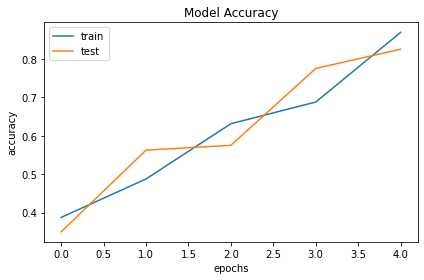

In [13]:
plt.plot(model_data.history['accuracy'])
plt.plot(model_data.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

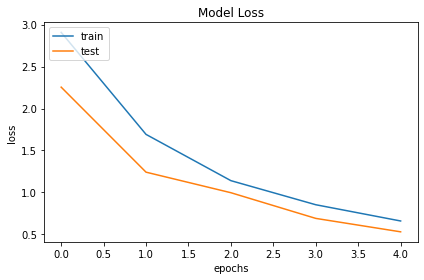

In [14]:
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('epochs')
plt.ylabel("loss")
plt.tight_layout()
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()